### Setting

In [1]:
import pandas as pd

In [2]:
path_dir = "./광진구 음카술/menu/"

In [3]:
dongs = ['광장동', '구의동', '군자동', '능동', '자양동', '중곡동', '화양동']
categorys = ['음식점', '카페', '술집']

In [4]:
# 뒤에 불러올 데이터는 카테고리 간 중복 제거가 되지 않은 데이터이므로 전처리 완료 된 데이터를 불러와 중복을 제거해준다.

path_cleaned ="./data/"

# 음식점
rst_0 = pd.read_csv(path_cleaned + "df_광진구음식점_cleaned.csv", encoding='utf-8-sig', index_col=False)
# 카페
rst_1 = pd.read_csv(path_cleaned + "df_광진구카페_cleaned.csv", encoding='utf-8-sig', index_col=False)
# 술집
rst_2 = pd.read_csv(path_cleaned + "df_광진구술집_cleaned.csv", encoding='utf-8-sig', index_col=False)

In [5]:
rst_0.head(5)

,name,category,sub_category,address,contact,platform,url,opneing_hours
0,범가,0,중식당,서울 광진구 광장로 58-1 1층,010-3627-7041,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
1,비스타 워커힐 서울 피자힐,0,피자,서울 광진구 워커힐로 177 워커힐 호텔앤리조트,02-6330-9020,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
2,비스타 워커힐 서울 더뷔페,0,뷔페,서울 광진구 워커힐로 177 비스타 워커힐 서울 1층,02-6330-9015,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
3,비스타 워커힐 서울 명월관,0,"육류,고기요리",서울 광진구 워커힐로 177 워커힐 호텔앤리조트,02-6330-9050,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,[]
4,어울림,0,"해물,생선요리",서울 광진구 광장로1나길 10,0507-1306-1470,0,https://map.naver.com/p/search/%EA%B4%91%EC%A7...,"['화 11:00 - 21:00 20:30 라스트오더', '수 11:00 - 21:..."


In [5]:
# 전처리 된 카테고리 별 식당(카페, 술집)의 리스트를 만들어준다

rst_0_names = list(rst_0['name'].unique())
rst_1_names = list(rst_1['name'].unique())
rst_2_names = list(rst_2['name'].unique())

In [6]:
# 각 동마다 데이터프레임을 로드하여 리스트에 추가
# 전처리되지 않은 raw 메뉴 데이터를 불러오기

dfs = []
for dong in dongs:
    for category in categorys:
        filename = f"restaurant_menu_{dong}_{category}_naver.csv"
        df = pd.read_csv(path_dir + filename, encoding='utf-8-sig', index_col = False)
        dfs.append(df)

# 리스트에 담긴 모든 데이터프레임을 하나로 합치기
combined_df = pd.concat(dfs, ignore_index=True)
combined_df = combined_df.iloc[:, 1:]

In [8]:
# 여기에는 중복되는 데이터도 존재하기에 이후 더 적어질 예정

print("전체 메뉴 개수 =", len(combined_df))
combined_df.head(5)

전체 메뉴 개수 = 59940


,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,"45,000"
1,어울림,하모 샤브샤브,"45,000"
2,어울림,매생이굴국밥,"10,000"
3,어울림,메밀막국수,"9,000"
4,어울림,메밀비빔국수,"9,000"


### 음식점 메뉴 전처리

In [10]:
# 위에서 전처리된 식당 테이블 리스트와 비교해 해당하는 것만 남긴다

# rst_name이 rst_0_names 리스트에 있는 값들만 필터링
df_rst0 = combined_df[combined_df['rst_name'].isin(rst_0_names)]
df_rst0.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_3172\3882267651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rst0.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)


In [163]:
df_rst0

,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,"45,000"
1,어울림,하모 샤브샤브,"45,000"
2,어울림,매생이굴국밥,"10,000"
3,어울림,메밀막국수,"9,000"
4,어울림,메밀비빔국수,"9,000"
...,...,...,...
53983,하남돼지집 세종대점,김치찌개(1인분),"7,000"
53984,하남돼지집 세종대점,고추장찌개(1인분),"7,000"
53985,하남돼지집 세종대점,우삼겹 된장찌개(1인분),"7,000"
53986,하남돼지집 세종대점,도시락김치볶음밥,"5,000"


In [164]:
df_rst0.describe()

,rst_name,menu_name,price
count,12581,12581,12310
unique,1056,9503,373
top,노랑통닭 아차산점,볶음밥,"8,000"
freq,70,55,557


In [11]:
# 281개의 가격 null값이 확인됨

df_rst0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12581 entries, 0 to 53987
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rst_name   12581 non-null  object
 1   menu_name  12581 non-null  object
 2   price      12310 non-null  object
dtypes: object(3)
memory usage: 393.2+ KB


결측치에 대한 확인 시, 서비스 혹은 시가(변동가격)인 것들이 nan으로 처리되어 있다.  
실제 크롤링 작업 시에도 이런 패턴을 확인하였기에 이는 드랍하기로 한다.

In [166]:
# 'price' 컬럼이 NaN(결측값)인 행들만 선택
df_rst0[df_rst0['price'].isna()]

,rst_name,menu_name,price
412,램스야,와인 콜키지,NaN
468,정성한줄 광장점,한우버섯소고기한줄,NaN
537,콩마당,(여름)콩국수,NaN
984,만복밥상,호두 강정,NaN
985,만복밥상,각종 반찬류,NaN
...,...,...,...
52512,사계절 건대본점,계란찜(무료),NaN
52513,사계절 건대본점,된장찌개(무료),NaN
52914,미친쭈꾸미 건대본점,콩나물사리,NaN
52915,미친쭈꾸미 건대본점,당면 사리,NaN


In [167]:
# 'price' 컬럼이 NaN(결측값)인 행들만 선택
df_rst0[df_rst0['price'].isna()]['menu_name'].unique()

array(['와인 콜키지', '한우버섯소고기한줄', '(여름)콩국수', '호두 강정', '각종 반찬류',
       '* 메인메뉴 포장 시 10% 할인', '매콤떡볶이', '어포깡', '버터플라이새우', '허니콘', '허니고구마',
       '양념치킨', '후라이드', '반반치킨', '간장치킨', '마늘치킨', '매운양념치킨', '매운후라이드',
       '핫데블치킨', '핫칠리치킨', '치즈뿌리오', '갑오징어숙회', '병어조림', '메뉴판', '닭도리탕', '안동찜닭',
       '묵은지돼지갈비찜', '오삼불고기', '통삼겹살', '광양석쇠불고기', '무뼈닭발', '통닭발', '야채곱창',
       '순대곱창', '순살불닭', '오돌뼈', '떡볶이', '불닭발', '족발', '보쌈', '뼈해장국', '순대국',
       '감자탕', '오리지널떡볶이', '매운맛마약떡볶이', '카레마약떡볶이', '짜장마약떡볶이', '달콤한마약떡볶이',
       '뼈닭발', '불막창', '치즈곱창 소', '치즈곱창 중', '치즈곱창 대', '야채곱창/순대곱창 소',
       '야채곱창/순대곱창 중', '야채곱창/순대곱창 대', '밥', '우니콜렉션', '옥돔구이',
       '✂️ 그릴링 서비스 제공 (무료)🔥', '막창 (국산)', '농어 & 돔 스팀 머리구이',
       '대구 뽈살 데리야끼 조림', '새우 튀김 & 닭 연골 튀김', '수제 라면땅', '속을 달래주는 누룽지 우동',
       '식감을 살려주는 야마고보', '달달한 두툼 스윗 장어 2P', '선택초밥', '모듬사시미', '광어사시미',
       '우럭사시미', '연어사시미', '도다리세꼬시', '모듬물회(활어+해산물)', '해물짬뽕탕', '주류/음료',
       '살치살', '부추만두', '버섯만두', '김치만두', '궈보루', '양조(계란)볶음밥', '지삼선', '류류똴',
       '웻 에이징 살치살 스테이크', '고봉민김밥', '돈까스김밥', '대전얼큰이

In [168]:
# nan값 제거
df_rst0 = df_rst0.dropna(subset=['price'])

# nan값 제거 이후 남은 메뉴 개수
print("nan값 제거 후 남은 메뉴 개수 =", len(df_rst0))

nan값 제거 후 남은 메뉴 개수 = 12310


정규표현식을 사용해 메뉴 이름 전처리

In [169]:
# 괄호 안의 내용 및 한자, 이모지 제거
# 괄호는 분석 결과 살리기로 했음

import re

def re_exp(df):
    # 이모지 제거를 위한 정규표현식 패턴
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # 스마일 이모티콘
                               u"\U0001F300-\U0001F5FF"  # 이모티콘 및 기호
                               u"\U0001F680-\U0001F6FF"  # 기호
                               u"\U0001F1E0-\U0001F1FF"  # 국기 표시 (1)
                               "]+", flags=re.UNICODE)

    # 이모지 제거
    df.loc[:, 'menu_name'] = df.loc[:, 'menu_name'].apply(lambda x: re.sub(emoji_pattern, '', x))

    # # 한자 제거를 위한 정규 표현식 패턴
    hanja_pattern = re.compile(r'[一-龥]+')

    # # 'menu_name' 열에서 한자 제거
    df.loc[:, 'menu_name'] = df.loc[:, 'menu_name'].apply(lambda x: re.sub(hanja_pattern, '', x))

    return df

test = re_exp(df_rst0)

In [170]:
# 잘 제거된 것을 확인

list(test['menu_name'].unique())

['새조개 샤브샤브',
 '하모 샤브샤브',
 '매생이굴국밥',
 '메밀막국수',
 '메밀비빔국수',
 '매생이칼국수',
 '해물된장찌개',
 '부추전',
 '고등어구이',
 '진계도 셰프 코스',
 '도 코스',
 '만수무강 코스',
 '원 코스',
 '복 코스',
 '경 코스',
 '평양냉면',
 '비빔냉면',
 '접시만두',
 '반접시만두',
 '수육',
 '만두국',
 '온반(동절기메뉴(10월~2월))',
 '제육',
 '제육 반접시',
 '온면(동절기메뉴(10월~3월))',
 '거냉(동절기메뉴(10월~3월))',
 '나루떡볶이',
 '새우김말이',
 '군당면',
 '부산어묵(4개)',
 '모둠버섯 서울 편백찜',
 '새우 소고기 서울 편백찜',
 '소고기 편백찜',
 '흑돼지 샤브샤브',
 '오징어 초무침',
 '간장새우밥',
 '간장낙지밥',
 '차돌 된장찌개',
 '소고기덮밥',
 '묵은지 어묵탕',
 '소고기 전골',
 '소고기 김치우동',
 '흑돼지 우동',
 '돼지찌개',
 '제육볶음',
 '김치생삼겹살',
 '닭한마리',
 '닭볶음탕',
 '닭곰탕',
 '닭 칼국수',
 '들깨 닭 칼국수',
 '들깨 닭곰탕',
 '초계국수',
 '수라상',
 '온달 낮것상',
 '궁중상',
 '한우 도가니 곰탕',
 '궁중 육개장',
 '전복 돌솥비빔밥',
 '제주갈치조림',
 '제주갈치구이',
 '수펙스 김치',
 '1. 탕수육(소) + 식사 택 1',
 '2. 북경탕수육 + 식사 택 2',
 '3. 북경탕수육 + 매콤쟁반짜장(2인)',
 '4. 북경탕수육 + 양장피',
 '5. 깐풍기(소) + 식사 택 1',
 '소고기짜장면',
 '고추짜장면',
 '소고기짬뽕(노른자 풀어드세요)',
 '매콤쟁반짜장(2인)',
 '해물볶음짬뽕(2인)',
 '북경탕수육(소)',
 '북경탕수육(중)',
 '사천탕수육(소)',
 '사천탕수육(중)',
 '칠리탕수육(볶아서 나갑니다)(소)',
 '오향장육(소)',
 '오향장육(중)',
 '팔보채(팔보라조)(소)',
 '팔보채(팔

In [171]:
# 중복 제거

df_rst0 = df_rst0.drop_duplicates(subset=['rst_name', 'menu_name'])
print("중복 메뉴 제거 후 =", len(df_rst0))

중복 메뉴 제거 후 = 12251


In [174]:
df_rst0[df_rst0.isnull().any(axis=1)]

,rst_name,menu_name,price


In [175]:
# nan값 제거

df_rst0 = df_rst0.dropna()
print("nan값 제거 이후 =", len(df_rst0))    

nan값 제거 이후 = 12251


In [ ]:
df_rst0

,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,"45,000"
1,어울림,하모 샤브샤브,"45,000"
2,어울림,매생이굴국밥,"10,000"
3,어울림,메밀막국수,"9,000"
4,어울림,메밀비빔국수,"9,000"
...,...,...,...
53983,하남돼지집 세종대점,김치찌개(1인분),"7,000"
53984,하남돼지집 세종대점,고추장찌개(1인분),"7,000"
53985,하남돼지집 세종대점,우삼겹 된장찌개(1인분),"7,000"
53986,하남돼지집 세종대점,도시락김치볶음밥,"5,000"


가격 분포 확인

In [ ]:
df_rst0['price'].dtype

dtype('O')

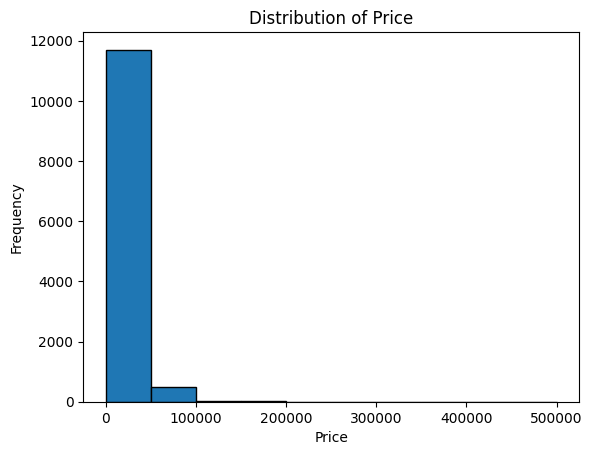

In [ ]:
import matplotlib.pyplot as plt

# 'price' 열의 데이터 타입을 숫자형으로 변환
df_rst0['price'] = df_rst0['price'].str.replace(',', '').astype(int)

# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(df_rst0['price'], bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [ ]:
max(df_rst0['price'])

df_rst0[df_rst0['price'] == 500000]

,rst_name,menu_name,price
14,그랜드 워커힐 서울 금룡,경 코스,500000


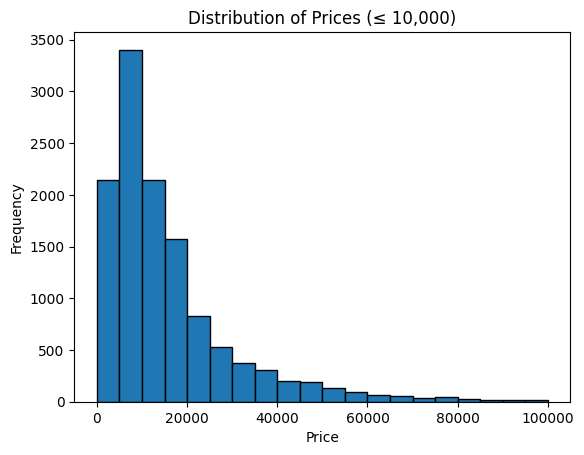

In [ ]:
# 100,000원 이하의 값이 대부분이므로 해당 구간에 대해서만 다시 히스토그램을 그린다
filtered_prices = df_rst0[df_rst0['price'] <= 100000]['price']

# 히스토그램 그리기
plt.hist(filtered_prices, bins=20, edgecolor='black')  # 5000원 단위로 나누어 20개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (≤ 10,000)')
plt.show()

In [ ]:
# 5000원 이하는 음식점에서 서비스, 음료, 사리, 배달비에 속하므로 드랍해준다

df_rst0[df_rst0['price'] <= 5000]

,rst_name,menu_name,price
29,나루떡볶이,나루떡볶이,4000
31,나루떡볶이,군당면,3000
32,나루떡볶이,부산어묵(4개),3000
95,주하객잔 본점,군만두(6pc),5000
96,주하객잔 본점,코카콜라(355ml),2000
...,...,...,...
53968,한촌설렁탕 건대입구역점,설렁탕육수(1봉),4500
53973,한촌설렁탕 건대입구역점,콜라,2000
53974,한촌설렁탕 건대입구역점,사이다,2000
53986,하남돼지집 세종대점,도시락김치볶음밥,5000


In [ ]:
# 가격 5000원 이상만 남김

df_rst0 = df_rst0[df_rst0['price'] > 5000]
df_rst0

,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,45000
1,어울림,하모 샤브샤브,45000
2,어울림,매생이굴국밥,10000
3,어울림,메밀막국수,9000
4,어울림,메밀비빔국수,9000
...,...,...,...
53981,하남돼지집 세종대점,커플세트(삼겹살2+목살1+된장찌개+도시락김치볶음밥)(2~3인분),54000
53982,하남돼지집 세종대점,패밀리세트(삼겹살2+목살2+우삼겹된장+도시락김치볶음밥)(3~4인분),75000
53983,하남돼지집 세종대점,김치찌개(1인분),7000
53984,하남돼지집 세종대점,고추장찌개(1인분),7000


In [ ]:
df_rst0['rst_name'].value_counts().sort_values(ascending=True)

rst_name
방이샤브샤브칼국수 세종대점     1
땅스부대찌개 광장동점        1
영화속의 김밥이야기         1
리나김밥               1
스시 마이도             1
                  ..
트라타 건국대점          43
춘향                44
복만루               55
노랑통닭 아차산점         57
시옌                66
Name: count, Length: 1011, dtype: int64

In [ ]:
# rst_name 별로 개수를 세기
counts_by_rst_name = df_rst0['rst_name'].value_counts()

# 개수가 3개 이하인 rst_name을 필터링
rst_name_to_drop = counts_by_rst_name[counts_by_rst_name < 3].index

# 필터링된 rst_name을 가진 행을 제거
df_rst0 = df_rst0[~df_rst0['rst_name'].isin(rst_name_to_drop)]

In [ ]:
df_rst0['rst_name'].nunique()

932

함수화

In [11]:
# 괄호 안의 내용 및 한자, 이모지 제거
# 괄호는 분석 결과 살리기로 했음

import re

def re_exp(df):
    # 이모지 제거를 위한 정규표현식 패턴
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # 스마일 이모티콘
                               u"\U0001F300-\U0001F5FF"  # 이모티콘 및 기호
                               u"\U0001F680-\U0001F6FF"  # 기호
                               u"\U0001F1E0-\U0001F1FF"  # 국기 표시 (1)
                               "]+", flags=re.UNICODE)

    # 이모지 제거
    df.loc[:, 'menu_name'] = df.loc[:, 'menu_name'].apply(lambda x: re.sub(emoji_pattern, '', x))

    # # 한자 제거를 위한 정규 표현식 패턴
    hanja_pattern = re.compile(r'[一-龥]+')

    # # 'menu_name' 열에서 한자 제거
    df.loc[:, 'menu_name'] = df.loc[:, 'menu_name'].apply(lambda x: re.sub(hanja_pattern, '', x))

    return df

In [12]:
def preprocess_menu(df, threshold):
    # price nan값 제거 (서비스, 변동가)
    df = df.dropna(subset=['price'])

    df = re_exp(df)

    # 정규식 제거 후 메뉴 이름 중복 제거
    df = df.drop_duplicates(subset=['rst_name', 'menu_name'])

    # nan값 제거
    df = df.dropna()

    # 임계값 이하의 가격 제거
    # 먼저 'price' 열의 데이터 타입을 숫자형으로 변환
    try:
        df['price'] = df['price'].str.replace(',', '').astype(int)
    except:
        pass
    df = df[df['price'] > threshold]

    # 최총 메뉴 3개 미만인 식당 제거
    counts_by_rst_name = df['rst_name'].value_counts()
    rst_name_to_drop = counts_by_rst_name[counts_by_rst_name < 3].index
    df = df[~df['rst_name'].isin(rst_name_to_drop)]

    return df

In [176]:
# 위에서 전처리된 식당 테이블 리스트와 비교해 해당하는 것만 남긴다

# rst_name이 rst_0_names 리스트에 있는 값들만 필터링
df_rst0 = combined_df[combined_df['rst_name'].isin(rst_0_names)]
df_rst0.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_20948\3882267651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rst0.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)


In [185]:
df_rst0_result = preprocess_menu(df_rst0, 5000)

In [186]:
df_rst0_result

,rst_name,menu_name,price
0,어울림,새조개 샤브샤브,45000
1,어울림,하모 샤브샤브,45000
2,어울림,매생이굴국밥,10000
3,어울림,메밀막국수,9000
4,어울림,메밀비빔국수,9000
...,...,...,...
53981,하남돼지집 세종대점,커플세트(삼겹살2+목살1+된장찌개+도시락김치볶음밥)(2~3인분),54000
53982,하남돼지집 세종대점,패밀리세트(삼겹살2+목살2+우삼겹된장+도시락김치볶음밥)(3~4인분),75000
53983,하남돼지집 세종대점,김치찌개(1인분),7000
53984,하남돼지집 세종대점,고추장찌개(1인분),7000


In [187]:
# 최종 남은 식당 개수

df_rst0_result['rst_name'].nunique()

932

In [188]:
df_rst0_result.to_csv(path_cleaned + "restaurant_menu_광진구음식점.csv", encoding='utf-8-sig', index=False)

### 카페 메뉴 전처리

In [7]:
# 위에서 전처리된 식당 테이블 리스트와 비교해 해당하는 것만 남긴다

# rst_name이 rst_1_names 리스트에 있는 값들만 필터링
df_rst1 = combined_df[combined_df['rst_name'].isin(rst_1_names)]
df_rst1.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_20172\1971662805.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rst1.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)


In [8]:
df_rst1

,rst_name,menu_name,price
26,크림베이글,뽀빠이 베이글,"4,300"
27,크림베이글,커피,"4,300"
28,크림베이글,디카페인커피,"4,800"
123,그랜드 워커힐 서울 르 파사쥬,블루베리 케이크,"74,000"
124,그랜드 워커힐 서울 르 파사쥬,치즈 수플레,"63,000"
...,...,...,...
56330,유니토스엔카페,바닐라라떼,"4,500"
56331,유니토스엔카페,페퍼민트,"2,000"
56332,유니토스엔카페,루이보스,"2,000"
56969,카페이츠,[마카다미아 화이트초코 쿠키] 은은한 단맛에 중독:D,"3,900"


In [9]:
df_rst1['rst_name'].nunique()

869

In [13]:
# 0원으로 설정해 드랍되는 메뉴없이 nan값등만 전처리

df_rst1 = preprocess_menu(df_rst1, 0)

In [21]:
df_rst1.describe()

,price
count,10358.000000
mean,6037.449315
std,11420.926701
min,1.000000
25%,3800.000000
50%,4600.000000
75%,6000.000000
max,999999.000000


In [14]:
df_rst1 = df_rst1[df_rst1['price'] <= 500000]

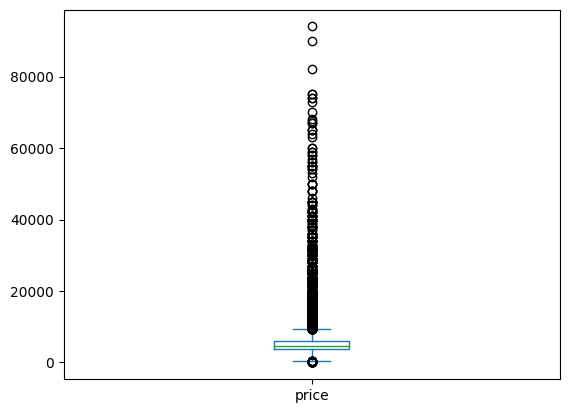

In [38]:
df_rst1['price'].plot(kind='box')
plt.show()

In [39]:
df_rst1[df_rst1['price'] >= 60000]

,rst_name,menu_name,price
123,그랜드 워커힐 서울 르 파사쥬,블루베리 케이크,74000
124,그랜드 워커힐 서울 르 파사쥬,치즈 수플레,63000
125,그랜드 워커힐 서울 르 파사쥬,레밍턴 샌드 케이크,74000
126,그랜드 워커힐 서울 르 파사쥬,순수 생크림 케이크,70000
127,그랜드 워커힐 서울 르 파사쥬,딸기 샌드 케이크,94000
283,르뱅포레,63.9 솜솜 피자,63900
3634,한스 광진점,프리미엄 세트 D,60000
3635,한스 광진점,프리미엄세트 E,67000
5284,라이크,보자기케이크,82000
5285,라이크,앙금플라워케이크(리스형),73000


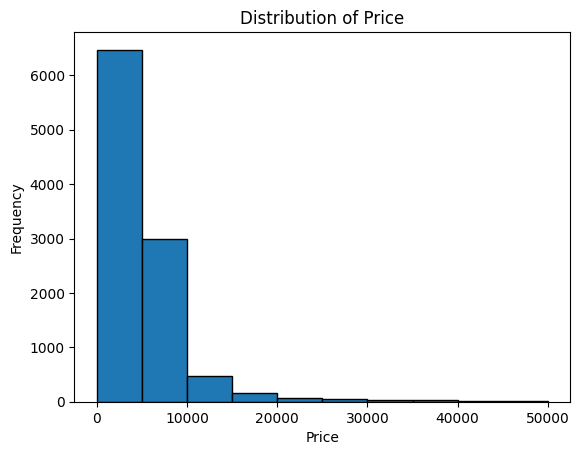

In [25]:
import matplotlib.pyplot as plt

filtered_prices = df_rst1[df_rst1['price'] <= 50000]['price']

# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(filtered_prices, bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

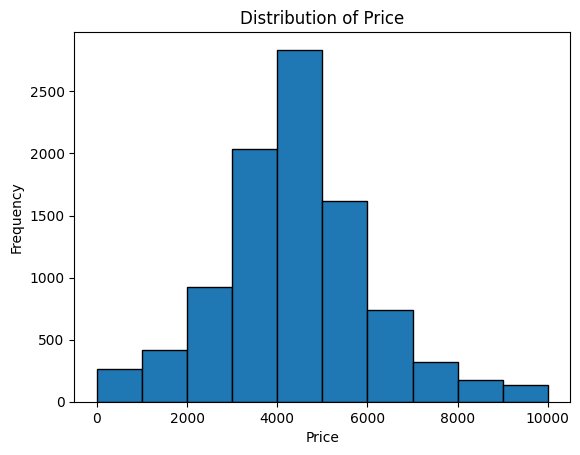

In [26]:
import matplotlib.pyplot as plt

filtered_prices = df_rst1[df_rst1['price'] <= 10000]['price']

# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(filtered_prices, bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [47]:
df_rst1[df_rst1['price'] == 500]

,rst_name,menu_name,price
318,오고,디카페인,500
460,카페나루,샷추가/디카페인/아이스 변경시,500
3927,설빙 구의점,연유소스,500
4152,집생로커피 구의점,바닐라시럽추가,500
4153,집생로커피 구의점,샷추가,500
...,...,...,...
55121,카페인중독 건대점,특수지역 할증(한림타워),500
55491,쏭타코야끼카페,네기 대파(대파(고명)),500
55558,킹프레소 화양점,킹프 500원 메뉴(아이스아메리카노),500
55559,킹프레소 화양점,킹프 500원 메뉴(복숭아아이스티),500


In [15]:
df_rst1 = preprocess_menu(df_rst1, 500)

In [16]:
df_rst1

,rst_name,menu_name,price
26,크림베이글,뽀빠이 베이글,4300
27,크림베이글,커피,4300
28,크림베이글,디카페인커피,4800
123,그랜드 워커힐 서울 르 파사쥬,블루베리 케이크,74000
124,그랜드 워커힐 서울 르 파사쥬,치즈 수플레,63000
...,...,...,...
56330,유니토스엔카페,바닐라라떼,4500
56331,유니토스엔카페,페퍼민트,2000
56332,유니토스엔카페,루이보스,2000
56969,카페이츠,[마카다미아 화이트초코 쿠키] 은은한 단맛에 중독:D,3900


In [17]:
df_rst1['rst_name'].nunique()

684

In [18]:
df_rst1.to_csv(path_cleaned + "restaurant_menu_광진구카페.csv", encoding='utf-8-sig', index=False)

### 술집 메뉴 전처리

In [19]:
# 위에서 전처리된 식당 테이블 리스트와 비교해 해당하는 것만 남긴다

# rst_name이 rst_2_names 리스트에 있는 값들만 필터링
df_rst2 = combined_df[combined_df['rst_name'].isin(rst_2_names)]
df_rst2.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)

C:\Users\MOONSOO\AppData\Local\Temp\ipykernel_20172\3911174674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rst2.drop_duplicates(subset=['rst_name', 'menu_name', 'price'], inplace=True)


In [20]:
df_rst2

,rst_name,menu_name,price
206,오늘,단호박안심구이,"38,000"
207,오늘,돼지고기 삼합,"22,000"
208,오늘,한우타다끼 샐러드,"28,000"
209,오늘,싱가폴누들,"24,000"
210,오늘,골뱅이 파스타 물회,"22,000"
...,...,...,...
59537,대팔,상합두부김치,"18,000"
59538,대팔,해물야끼우동,"18,000"
59539,대팔,왕새우&과일샐러드,"18,000"
59540,대팔,특선해물어묵탕,"18,000"


In [21]:
# 전처리 전 유니크 술집 개수
df_rst2['rst_name'].nunique()

542

In [54]:
df_rst2 = preprocess_menu(df_rst2, 0)

In [55]:
df_rst2.describe()

,price
count,4.911000e+03
mean,1.783847e+04
std,3.227240e+04
min,1.000000e+01
25%,1.000000e+04
50%,1.600000e+04
75%,2.000000e+04
max,1.800000e+06


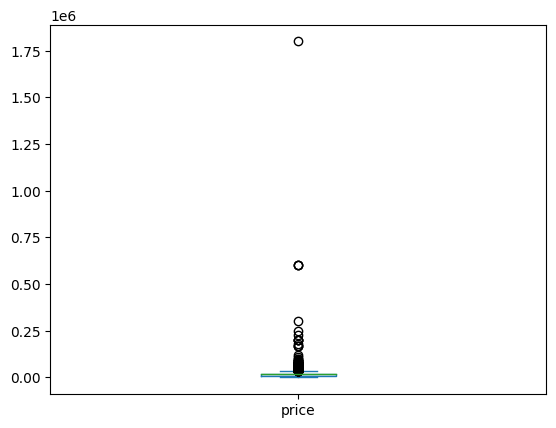

In [56]:
df_rst2['price'].plot(kind='box')
plt.show()

In [59]:
df_rst2[df_rst2['price'] >= 100000]

,rst_name,menu_name,price
2023,한강썸라이브,세트 A,230000
2024,한강썸라이브,세트 B,200000
2025,한강썸라이브,세트 C,170000
2026,한강썸라이브,세트 D,200000
2027,한강썸라이브,세트 E,170000
2028,한강썸라이브,세트 F,200000
2029,한강썸라이브,세트 G,170000
2030,한강썸라이브,발렌타인 30년,1800000
2031,한강썸라이브,발렌타인 21년,600000
2032,한강썸라이브,발렌타인 17년,300000


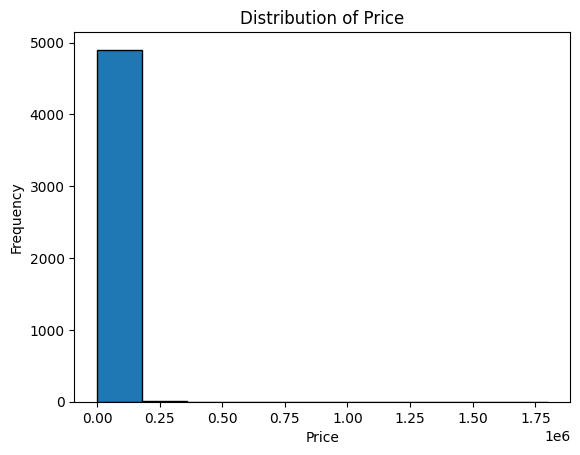

In [57]:
import matplotlib.pyplot as plt


# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(df_rst2['price'], bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

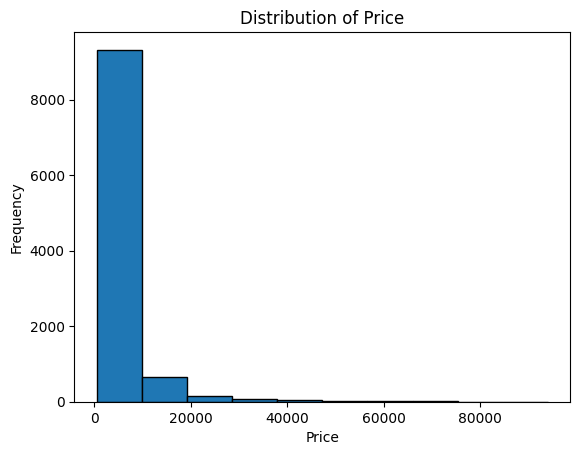

In [60]:
import matplotlib.pyplot as plt

filtered_prices = df_rst1[df_rst1['price'] <= 100000]['price']

# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(filtered_prices, bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

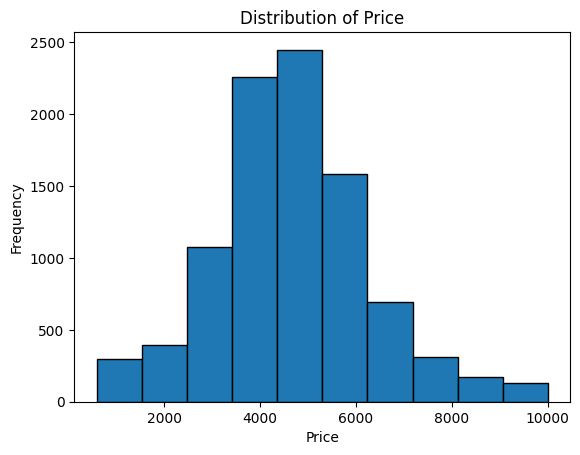

In [61]:
import matplotlib.pyplot as plt

filtered_prices = df_rst1[df_rst1['price'] <= 10000]['price']

# 히스토그램 그리기
# plt.figure(figsize=(10, 10))
plt.hist(filtered_prices, bins=10, edgecolor='black')  # 10개의 구간으로 나누어 히스토그램 그리기
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [66]:
df_rst2[df_rst2['price'] <= 1000]

,rst_name,menu_name,price
2328,모두랑,야끼만두,700
2329,모두랑,못난이,700
2330,모두랑,계란,700
2331,모두랑,김말이,700
6682,이츠민,등등등,10
14008,알콜스낵,후라이드윙,900
14256,우기,연두부 토마토,1000
14582,짱구야학교가자 건대점,공기밥,1000
15568,코렌초하우스,올리브,1000
15648,예원곱창막창 능동점,공기밥,1000


In [22]:
df_rst2 = preprocess_menu(df_rst2, 1000)

In [23]:
df_rst2

,rst_name,menu_name,price
206,오늘,단호박안심구이,38000
207,오늘,돼지고기 삼합,22000
208,오늘,한우타다끼 샐러드,28000
209,오늘,싱가폴누들,24000
210,오늘,골뱅이 파스타 물회,22000
...,...,...,...
59537,대팔,상합두부김치,18000
59538,대팔,해물야끼우동,18000
59539,대팔,왕새우&과일샐러드,18000
59540,대팔,특선해물어묵탕,18000


In [24]:
df_rst2['rst_name'].nunique()

428

In [25]:
df_rst2.to_csv(path_cleaned + "restaurant_menu_광진구술집.csv", encoding='utf-8-sig', index=False)

### 정리

In [184]:
print(len(df_rst0) + len(df_rst1) + len(df_rst2))

28636
